In [3]:
import pandas as pd           # For data handling
import matplotlib.pyplot as plt  # For static plots
import seaborn as sns         # For statistical visualizations
import plotly.express as px   # For interactive plots
import geopandas as gpd

In [5]:
#Task 1
#reading the dataset available
try:
    df = pd.read_csv("hiv_prevalence.csv")
    print("Dataset read successfully.")
except Exception as e:
    print("Error reading dataset:", e)
    

Dataset read successfully.


In [6]:
#Task 2
#Calling the df to display the table
df.head()


,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
0,Eswatini,28.30%,"240,000","3,000",2024
1,Lesotho,24.10%,"403,000","5,380",2024
2,Botswana,22.60%,"398,500","5,240",2024
3,Zimbabwe,22.10%,"1,660,000","25,600",2024
4,South Africa,14%,"9,230,000","77,000",2024


In [5]:
#Check for missing values
df.isnull().sum()

Country/Region                    0
Adult prevalence of HIV/AIDS      0
Number of people with HIV/AIDS    0
Annual deaths from HIV/AIDS       0
Year of estimate                  0
dtype: int64

In [6]:
#data per mean, median, standard deviation
df.describe()


,Year of estimate
count,187.000000
mean,2021.080214
std,3.391797
min,2013.000000
25%,2016.000000
50%,2023.000000
75%,2024.000000
max,2024.000000


In [7]:
#Grouping data per year
annual_deaths_by_year = df.groupby('Year of estimate').size().reset_index(name='Annual deaths from HIV/AIDS')
print('annual deaths per year',annual_deaths_by_year)

annual deaths per year    Year of estimate  Annual deaths from HIV/AIDS
0              2013                            1
1              2016                           48
2              2018                            7
3              2019                            7
4              2021                            4
5              2022                            8
6              2023                           46
7              2024                           66


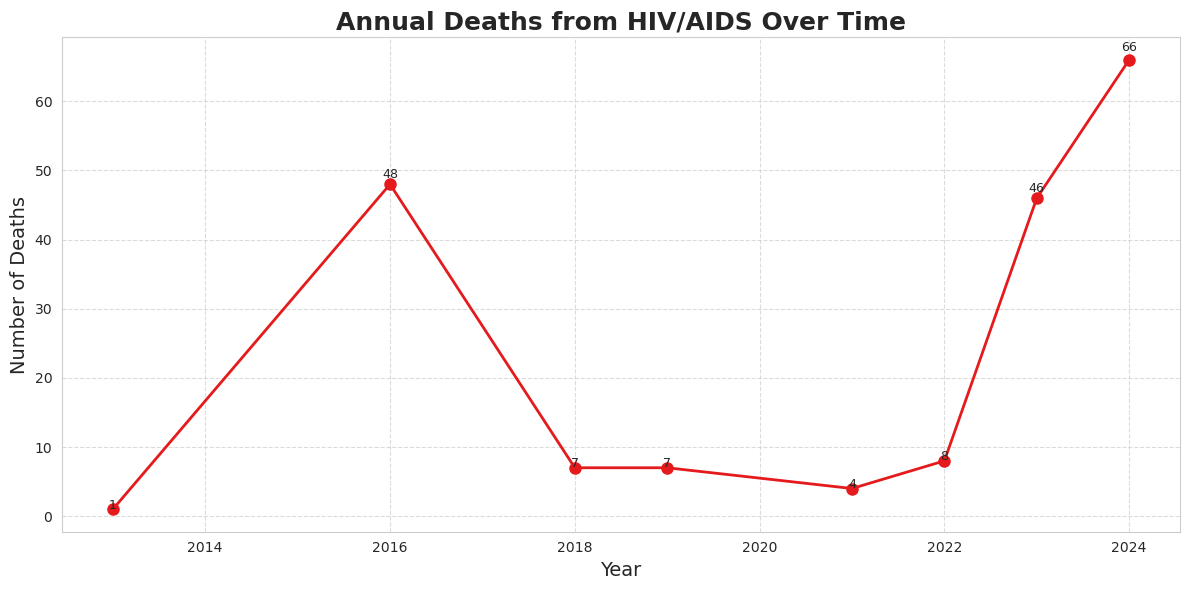

In [10]:
#Task3
# Creating the line chart

# Set the style for better visualization
sns.set_style("whitegrid")

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(annual_deaths_by_year['Year of estimate'], 
         annual_deaths_by_year['Annual deaths from HIV/AIDS'], 
         marker='o', 
         linestyle='-', 
         linewidth=2,
         color='#E41A1C',  # Red color for HIV/AIDS data
         markersize=8)

# Customize the plot
plt.title('Annual Deaths from HIV/AIDS Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels for each point
for x, y in zip(annual_deaths_by_year['Year of estimate'], annual_deaths_by_year['Annual deaths from HIV/AIDS']):
    plt.text(x, y + (y * 0.02), f'{y:,}', ha='center', fontsize=9)

# Format y-axis with comma separators for thousands
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

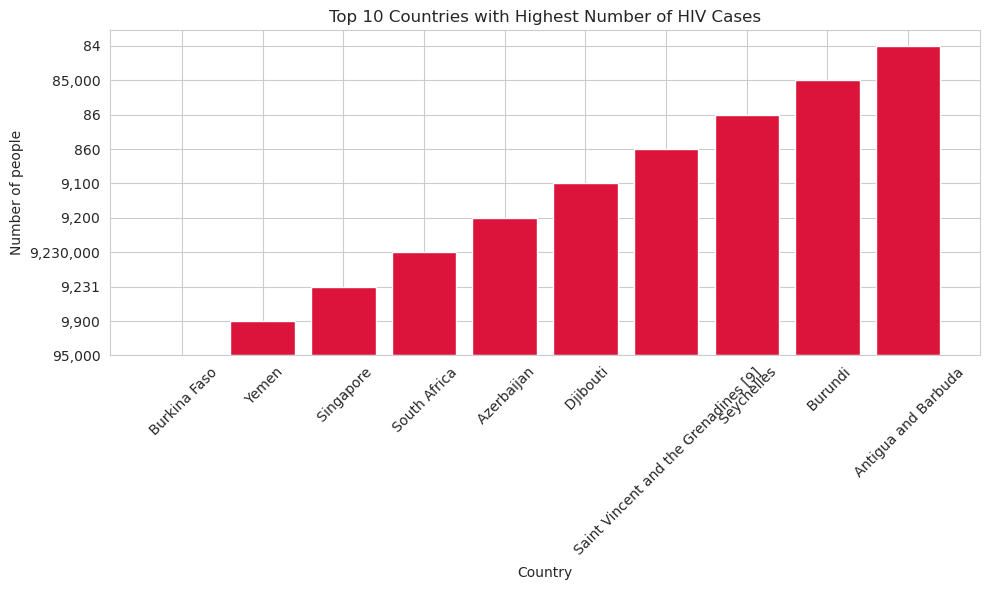

In [15]:
# Create a simple bar chart
# Sort by HIV cases in descending order and select top 10
top10 = df.sort_values(by='Number of people with HIV/AIDS', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top10['Country/Region'], top10['Number of people with HIV/AIDS'], color='crimson')
plt.xlabel('Country')
plt.ylabel('Number of people')
plt.title('Top 10 Countries with Highest Number of HIV Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

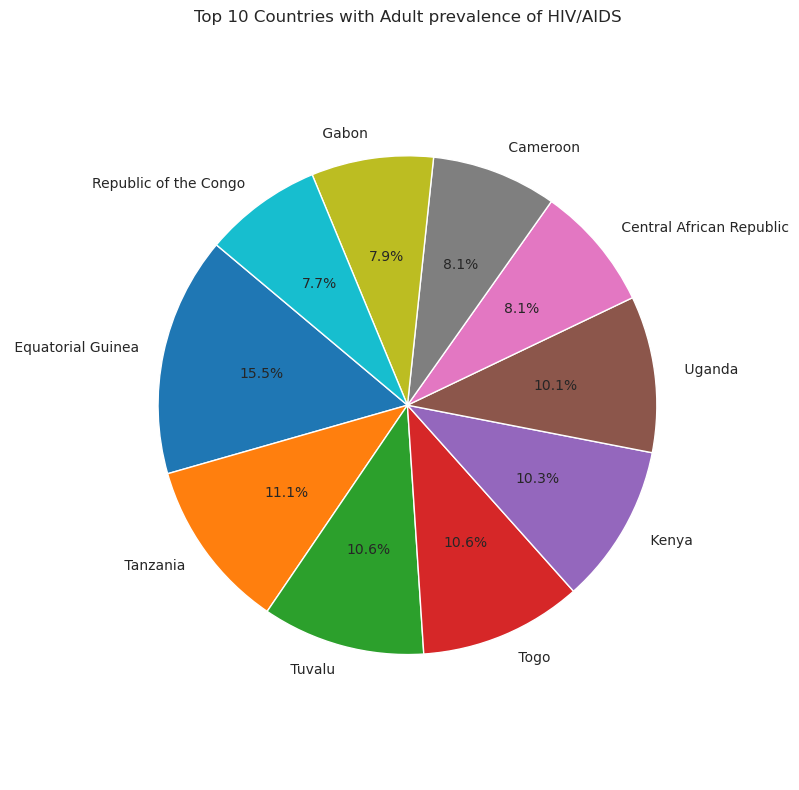

In [18]:
#Create a pie chart
# Sort by Adult prevalence of HIV/AIDS in descending order and select top 10
top10 = df.sort_values(by='Adult prevalence of HIV/AIDS', ascending=False).head(10)
#change % into float
top10['Adult prevalence of HIV/AIDS'] = top10['Adult prevalence of HIV/AIDS'].str.replace('%', '').astype(float)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top10['Adult prevalence of HIV/AIDS'], labels=top10['Country/Region'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries with Adult prevalence of HIV/AIDS')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()

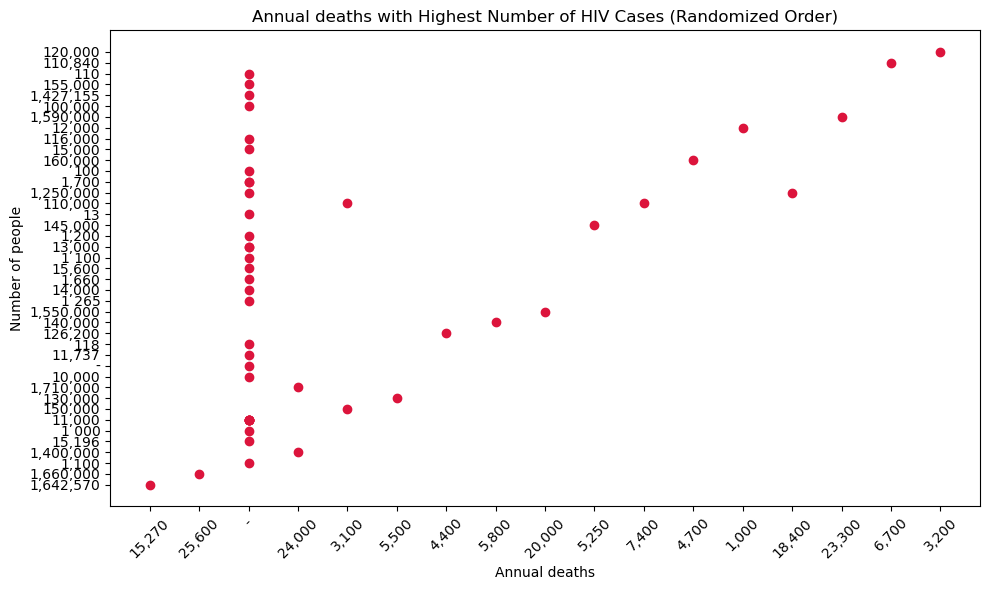

In [11]:
#Scatter graph
# Sort by HIV cases in descending order and select top 10
top20 = df.sort_values(by='Number of people with HIV/AIDS').head(5)

# Randomize the order of the top 10
top20_random = top20.sample(frac=1, random_state=20).reset_index(drop=True)


# Create the bar plot for the randomized order
plt.figure(figsize=(10, 6))
plt.scatter(top50_random['Annual deaths from HIV/AIDS'], top50_random['Number of people with HIV/AIDS'], color='crimson')
plt.xlabel('Annual deaths')
plt.ylabel('Number of people')
plt.title('Annual deaths with Highest Number of HIV Cases (Randomized Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
